In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import parse
import plotly.graph_objs as go
import plotly.offline as py

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [11]:
dados = pd.read_csv(r'C:\Users\bcn20\Desktop\enem\ENEM_1999.csv', delimiter=';', encoding='iso-8859-1', usecols=['NU_IDADE', 'TP_SEXO', 'NO_MUNICIPIO_RESIDENCIA', 'TP_PRESENCA'])
dados    #COMANDO PARA ABRIR O ARQUIVO E COLUNAS ESPECIFICAS

,NU_IDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,TP_PRESENCA
0,18.0,F,MANAUS,0
1,26.0,M,MANAUS,1
2,25.0,M,MANAUS,1
3,21.0,F,MANAUS,1
4,21.0,F,MANAUS,0
...,...,...,...,...
346948,17.0,M,TUPA,1
346949,17.0,M,ESTRELA DOESTE,1
346950,18.0,M,URANIA,1
346951,17.0,M,FERNANDOPOLIS,1


In [12]:
dados.rename(columns={'NU_IDADE':'IDADE','TP_SEXO':'SEXO','NO_MUNICIPIO_RESIDENCIA':'RESIDENCIA','TP_PRESENCA':'PRESENCA'}, inplace = True)

In [13]:
dados.head()

,IDADE,SEXO,RESIDENCIA,PRESENCA
0,18.0,F,MANAUS,0
1,26.0,M,MANAUS,1
2,25.0,M,MANAUS,1
3,21.0,F,MANAUS,1
4,21.0,F,MANAUS,0


In [14]:
dados.isnull().sum()       #ANALISANDO DADOS NULOS

IDADE         1559
SEXO             0
RESIDENCIA       1
PRESENCA         0
dtype: int64

In [15]:
dados.dropna(inplace=True) #APAGANDO LINHAS QUE NAO TEM INFORMAÇÕES

In [16]:
dados.min()

IDADE         10
SEXO           F
RESIDENCIA     .
PRESENCA       0
dtype: object

In [17]:
dados.loc[dados['IDADE']== 10] #listando as pessoas que tem 10 anos


,IDADE,SEXO,RESIDENCIA,PRESENCA
4482,10.0,F,MANAQUIRI,0
12701,10.0,M,BRASILIA,0
25093,10.0,F,SERRA,1
41926,10.0,F,SAO LUIS,1
47315,10.0,F,BETIM,1
50624,10.0,F,PECANHA,1
52095,10.0,F,MARTINS SOARES,1
67799,10.0,F,BELO HORIZONTE,1
67800,10.0,F,BELO HORIZONTE,1
73227,10.0,F,VIRGEM DA LAPA,1


In [4]:
dados.max()

NU_IDADE       99
TP_SEXO         M
TP_PRESENCA     1
dtype: object

In [18]:
dados.loc[dados['IDADE']== 99]


,IDADE,SEXO,RESIDENCIA,PRESENCA
20494,99.0,F,BRASILIA,1
55165,99.0,F,ALF VASCONCELOS,1
135216,99.0,F,OLINDA,0
142641,99.0,F,RECIFE,1
168489,99.0,F,RIO DE JANEIRO,1
266484,99.0,M,S B DO CAMPO,1
340501,99.0,M,CACOAL,1


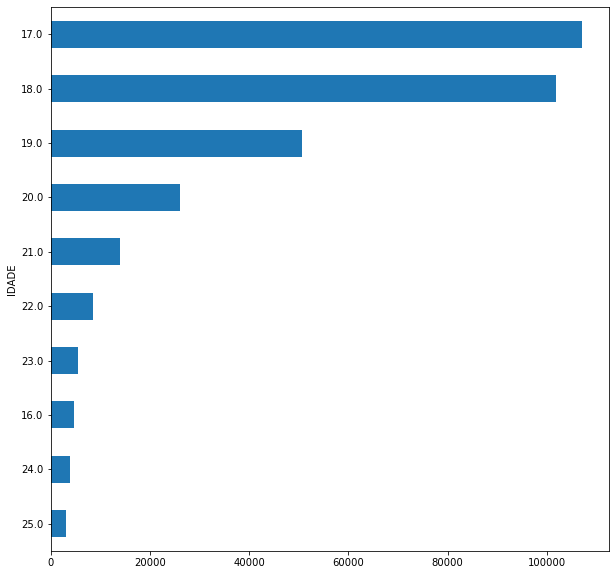

In [25]:
dados.groupby('IDADE').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))


In [26]:
dados.drop(dados[dados.PRESENCA==0].index ,inplace=True) # 0 SÃO PESSOAS Q NAO COMPARECERAM E 1 COMPARECERAM, APAGUEI TODOS OS QUE NAO FORAM COM ESSE COMANDO

In [13]:
dados.columns #COLUNAS CONTIDAS

Index(['IDADE', 'SEXO', 'RESIDENCIA', 'PRESENCA'], dtype='object')

In [29]:
dados['RESIDENCIA'].value_counts() #TOTAL DE PESSOAS POR MUNICIPIOS


SAO PAULO          45621
CURITIBA           15403
RIO DE JANEIRO     13739
CAMPINAS            7329
BELO HORIZONTE      6015
                   ...  
FERREIRA GOMES         1
PAIM FILHO             1
RIBEIRAO DAS NE        1
CHAP GUIMARAES         1
ENTRE RIOS DO S        1
Name: RESIDENCIA, Length: 6669, dtype: int64

In [15]:
dados['SEXO'].value_counts() #MAIOR NUMERO FEMININO PRESTANDO ENEM


F    189896
M    124692
Name: SEXO, dtype: int64

In [16]:
municipio = dados.groupby(['RESIDENCIA']) #AGRUPAMENTO 


In [17]:
municipio.get_group('SAO JOSE CAMPOS') #1811 PESSOAS PRESTARAM O ENEM EM SJC

,IDADE,SEXO,RESIDENCIA,PRESENCA
220181,19.0,M,SAO JOSE CAMPOS,1
220486,18.0,M,SAO JOSE CAMPOS,1
220779,25.0,M,SAO JOSE CAMPOS,1
223490,17.0,F,SAO JOSE CAMPOS,1
274387,17.0,M,SAO JOSE CAMPOS,1
...,...,...,...,...
296119,17.0,F,SAO JOSE CAMPOS,1
296128,17.0,M,SAO JOSE CAMPOS,1
296130,20.0,M,SAO JOSE CAMPOS,1
300979,21.0,F,SAO JOSE CAMPOS,1


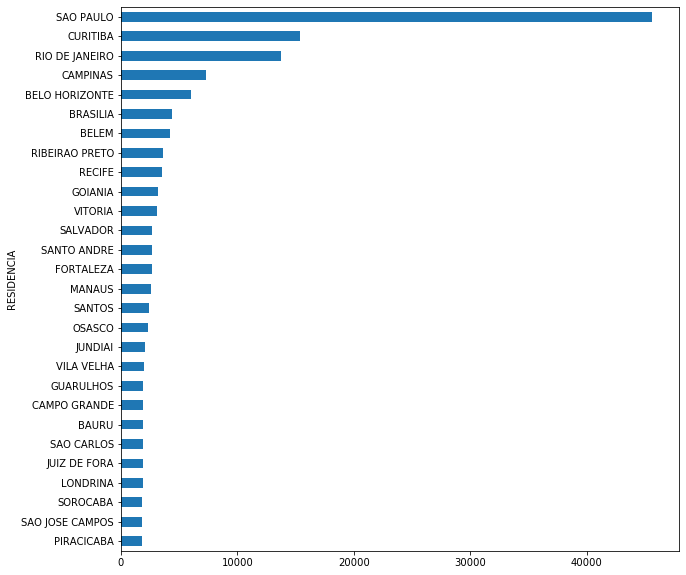

In [18]:
dados.groupby('RESIDENCIA').size().sort_values().tail(28).plot(kind='barh', figsize=(10,10))

 #SAO PAULO TEVE O MAIOR NUMERO DE PESSOAS
 #"SAO JOSE CAMPOS" FICOU EM 27° DE PESSOAS QUE PRESTARAM O ENEM

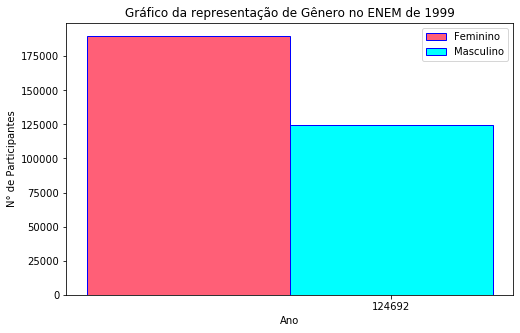

In [52]:
# Gráfico comparativos Masculinos X Femininos

Feminino = [189896]
Masculino = [124692]

# Definindo a largura das barras
barWidth = 0.10

# Aumentando o gráfico
plt.figure(figsize=(8,5))

# Definindo a posição das barras
b1 = np.arange(len(Feminino))
b2 = [x + barWidth for x in b1]
 
# Criando as barras
plt.bar(b1, Feminino, color='#ff5f77', width=barWidth, label='Feminino', edgecolor='b')
plt.bar(b2, Masculino, color='#00FFFF', width=barWidth, label='Masculino', edgecolor='b')


# Adicionando legendas as barras
plt.xlabel('Ano')
plt.xticks([r + barWidth for r in range(len(Masculino))], ['124692'])
plt.ylabel('N° de Participantes')
plt.title('Gráfico da representação de Gênero no ENEM de 1999')
 
# Criando a legenda e exibindo o gráfico
plt.legend()
plt.show()